<a href="https://colab.research.google.com/github/victorgmoreno/CatsAndDogs/blob/main/CatsNDgos_CNN__Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importando as bibliotecas e pacotes que serão usadas no projeto**

In [ ]:
# Importando as bibliotecas necessárias para dados, processamento e machine learning
#  !pip install sklearn
#  !pip install np_utils
#  !pip install tensorflow as tf

import os, cv2, itertools #
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 
import sklearn
%matplotlib inline

from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# **2. Fazendo download dos arquviso do dataset**

In [ ]:
# Procedimento para extração do dataset que está no kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Acessando a URL do kaggle para download
! kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

# Descompactando o dataset
! unzip cats-and-dogs-breeds-classification-oxford-dataset

# **3. Organizando os dados**

In [ ]:
# Transformando os diretorios de cada imagem em uma lista de diretorios

imageDiretorio = os.listdir('/content/images/images')

# Alguns arquivos no dataset não estão no formato JPG, para sanar isso:


imageDiretorio = ([image for image in imageDiretorio if image.split('.')[-1] == 'jpg'])

print("A quantidade de diretórios de imagens acessados é:", len(imageDiretorio))

# Para começar a organizar os dados, precisa-se criar algumas variáveis globais

canais = 3
linhas = 150
colunas = 150
size = (linhas, colunas)

A quantidade de diretórios de imagens acessados é: 7390


In [ ]:
print(imageDiretorio)

In [ ]:
# imageDiretorio = shuffle(imageDiretorio)

In [ ]:
# print(imageDiretorio)

In [ ]:
# Agora, separaremos as imagens de gatos e de cachorros para a máquina
gatosDiretorio = []
cachorrosDiretorio = []

for i in range(0, len(imageDiretorio)):
  if imageDiretorio[i][0].isupper():
    gatosDiretorio.append(imageDiretorio[i])
  else:
    cachorrosDiretorio.append(imageDiretorio[i])

In [ ]:
ygatos = np.zeros(len(gatosDiretorio), dtype=int)
ycachorros = np.ones(len(cachorrosDiretorio), dtype=int)
X_train = gatosDiretorio+cachorrosDiretorio
Y_train = np.concatenate((ygatos, ycachorros))
# GATOS = 0 E CACHORRO = 1

# **4. Pré processamento**

In [ ]:
# Criando uma função para visualizar as imagens, quando quisermos
# ! pip install Pillow

import cv2
import matplotlib.pyplot as plt
import PIL.Image

def read_image(file_path):
  rgba_image = PIL.Image.open("/content/images/images/" + file_path)
  rgb_image = rgba_image.convert('RGB')
  rgb_image = np.array(rgb_image)
  return cv2.resize(rgb_image, size, interpolation=cv2.INTER_CUBIC)

In [ ]:
def prep_data(images):
  m = len(images)
  n_x = linhas*colunas*canais
  

  X = np.ndarray((m, linhas, colunas, canais), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((linhas, colunas, canais)))
    if imageDiretorio[i][0].isupper():
      y[i,0] = 0  # cat
    else:
      y[i,0] = 1  # dog
    
  return X,y

In [ ]:

X_train, y_train = prep_data(imageDiretorio)

X.shape is (7390, 150, 150, 3)


In [ ]:
# Separando os arquivos para treino. Ele totaliza 80% das imagens.
X_train, X_test, y_train, test_idx = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)  #80% of dataset will be used for training

In [ ]:
# Separando os arquivos para teste e validação. Eles totalizam 20% das imagens, 10% cada um. 
X_test, X_val, y_test, y_val = train_test_split(X_test, test_idx , test_size = 0.5, random_state = 1)  #42% of dataset will be used for test and validation

In [ ]:
print(len(X_train))
print("X_train.shape is {}".format(X_train.shape))
print(len(y_train))
print("y_train.shape is {}".format(y_train.shape))

print(len(X_test))
print("X_test.shape is {}".format(X_test.shape))
print(len(y_test))
print("y_test.shape is {}".format(y_test.shape))

print(len(X_val))
print("X_val.shape is {}".format(X_val.shape))
print(len(y_val))
print("y_val.shape is {}".format(y_val.shape))


5912
X_train.shape is (5912, 150, 150, 3)
5912
y_train.shape is (5912, 1)
739
X_test.shape is (739, 150, 150, 3)
739
y_test.shape is (739, 1)
739
X_val.shape is (739, 150, 150, 3)
739
y_val.shape is (739, 1)


In [ ]:
classes = {0: 'gatos',
           1: 'cachorros'}

In [ ]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(5912, 2)
2
(739, 2)


In [ ]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

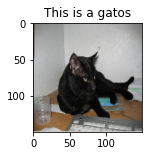

In [ ]:
show_images(X_train, y_train, 545)

In [ ]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(linhas, colunas, canais), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [ ]:
history = model.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size=128)


Epoch 1/50
47/47 [==============================] - 26s 239ms/step - loss: 0.6674 - accuracy: 0.6681 - val_loss: 0.6520 - val_accuracy: 0.6644
Epoch 2/50
47/47 [==============================] - 9s 191ms/step - loss: 0.6094 - accuracy: 0.6769 - val_loss: 0.6238 - val_accuracy: 0.6644
Epoch 3/50
47/47 [==============================] - 9s 192ms/step - loss: 0.5939 - accuracy: 0.6769 - val_loss: 0.6350 - val_accuracy: 0.6644
Epoch 4/50
47/47 [==============================] - 9s 192ms/step - loss: 0.5851 - accuracy: 0.6835 - val_loss: 0.6062 - val_accuracy: 0.6644
Epoch 5/50
47/47 [==============================] - 9s 192ms/step - loss: 0.5648 - accuracy: 0.6993 - val_loss: 0.5745 - val_accuracy: 0.6793
Epoch 6/50
47/47 [==============================] - 9s 190ms/step - loss: 0.5484 - accuracy: 0.7175 - val_loss: 0.5700 - val_accuracy: 0.6861
Epoch 7/50
47/47 [==============================] - 9s 194ms/step - loss: 0.5327 - accuracy: 0.7287 - val_loss: 0.5633 - val_accuracy: 0.7226
Epoch

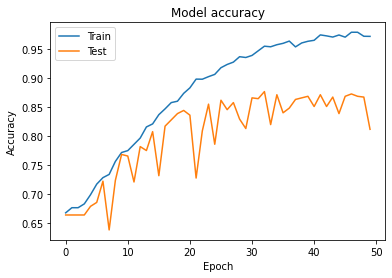

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

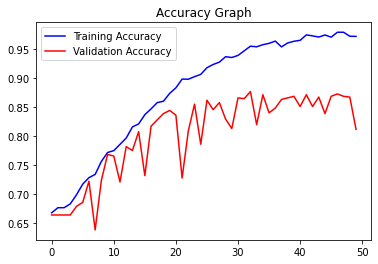

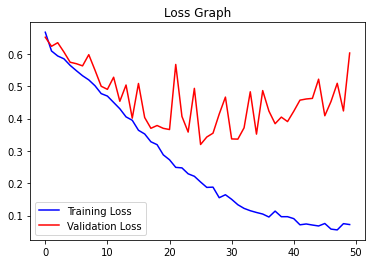

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()